In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import string
from collections import Counter
import numpy as np

## To have in the data collection :

In [2]:
def url_to_label(url):
    last_part = url.rstrip('/').split('/')[-1]  # We only keep the last part of the url
    label = ' '.join([word.capitalize() for word in last_part.replace('-', ' ').replace('_', ' ').split()])  # We delete unwanted element ("_") and replace them by a space. The following letter is set as a capital letter.
    return label

In [3]:
import csv

def create_nodes_csv(all_links, output_file="nodes.csv", label_function=url_to_label):
    nodes = set(all_links.keys())  # Each key of the dictionnary "all_links" is a node (we don't keep any possible duplicate)
    for targets in all_links.values():
        nodes.update(targets)  # Each value of the dictionnary is a node

    with open(output_file, mode="w", newline="", encoding="utf-8") as f:  # Create (or open) a csv file 
        writer = csv.writer(f)  # Create an object that will enable our code to write within the file

        if label_function:
            writer.writerow(["node_id", "label"])  # If we want different labels than the url, we can give the function an other function that will creates those labels
        else:
            writer.writerow(["node_id"])  # If no function to labelize was given, we just have the node_id in the file
        print("This function is used to labelize the urls:", label_function)
        for node in nodes:
            if label_function:
                try:
                    label = label_function(node)  # We write in the column "label" the label given by the function
                except Exception:
                    label = node  # In case of error, we keep the url (the node) as the label
                writer.writerow([node, label])
            else:
                writer.writerow([node])  # If there is no label, we just write the url of the node in the write column

    #print(f"Nodes CSV created: {len(nodes)} nodes")

In [ ]:
def create_nodes_csv(all_links, output_file="nodes.csv"):
    nodes = set(all_links.keys())  # Each key of the dictionnary "all_links" is a node (we don't keep any possible duplicate)
    for targets in all_links.values():
        nodes.update(targets)  # Each value of the dictionnary is a node

    with open(output_file, mode="w", newline="", encoding="utf-8") as f:  # Create (or open) a csv file 
        writer = csv.writer(f)  # Create an object that will enable our code to write within the file
        writer.writerow(["node_id"])
        for node in nodes:
            writer.writerow([node])  


In [4]:
def create_edges_csv(links, output_file="edges.csv"):
    
    with open(output_file, mode="w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["source", "target"])  # We start by writing the headers of our column

        for source, targets in links.items():
            for target in targets:  # Mettre "set(targets)"" si je veux éviter les doublons (A -> B), il comprend bien que A -> B x=x B -> A donc tkt
                # A ajouter / tester (devrait empecher les boucles infines)
                if target != source:  
                    writer.writerow([source, target])  # If the target is different form the source (not A -> A), we add the relation in our file
                else :
                    continue

    #print(f"Edges CSV created: {edge_count} edges")

# ---------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import os
print(os.getcwd())


c:\Users\Violaine\OneDrive\Ecole\Master 1\Web mining\Projet Web Mining\Projet_Web_Mining\Link Analysis


In [ ]:
import os
import pandas as pd

# Chemin vers le dossier "data" à partir du script
data_dir = "data"

wiki_nodes_path = os.path.join(data_dir, "wikipedia_nodes.csv")
wiki_edges_path = os.path.join(data_dir, "wikipedia_edges.csv")

wiki_nodes = pd.read_csv(wiki_nodes_path)
wiki_edges = pd.read_csv(wiki_edges_path)


FileNotFoundError: [Errno 2] No such file or directory: 'data\\wikipedia_nodes.csv'

In [ ]:
wiki_nodes = pd.read_csv("data/wikipedia_nodes.csv")
wiki_edges = pd.read_csv("data/wikipedia_edges.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'data/wikipedia_nodes.csv'

# ------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
wiki_nodes_path = r"C:\Users\Violaine\OneDrive\Ecole\Master 1\Web mining\Projet Web Mining\Projet_Web_Mining\data\wikipedia_nodes.csv"
wiki_edges_path = r"C:\Users\Violaine\OneDrive\Ecole\Master 1\Web mining\Projet Web Mining\Projet_Web_Mining\data\wikipedia_edges.csv"

wiki_nodes = pd.read_csv(wiki_nodes_path)
wiki_edges = pd.read_csv(wiki_edges_path)

print(len(wiki_edges))
print(len(wiki_nodes))

1701
1639


In [9]:
# Useful to check if all nodes present in the edges file are in the nodes file as well (the result here should be 0)
invalid_edges = wiki_edges[
    ~wiki_edges['source'].isin(wiki_nodes['id']) |
    ~wiki_edges['target'].isin(wiki_nodes['id'])
]

len(invalid_edges)

0

## Computation of the Adjacency Matrix

In [10]:
import pandas as pd
import numpy as np

wiki_node_ids = wiki_nodes['id'].tolist()  # Transform the nodes ids into a list

wiki_node_to_idx = {node_id: idx for idx, node_id in enumerate(wiki_node_ids)}  # Create a dictionnary where each node id correspond to a number (key : id)
wiki_idx_to_node = {idx: node_id for node_id, idx in wiki_node_to_idx.items()}  # Create a dictionnary where each node id correspond to a number (key : number)

In [11]:
n = len(wiki_node_ids)  # Count the number of nodes (the adjancy matrix will have a n x n format)
wiki_adjacency_matrix = np.zeros((n, n), dtype=int)  # Initialising the matrix with 0 with the correct number of rows and columns (= n x n)

for _, row in wiki_edges.iterrows():  # For each row of the wiki edges document
    source = row['source']
    target = row['target']

    if source in wiki_node_to_idx and target in wiki_node_to_idx:  # Verify that each source and target nodes of the edge document is in the nodes document
        i = wiki_node_to_idx[source]
        j = wiki_node_to_idx[target]

        wiki_adjacency_matrix[i, j] += 1
        #wiki_adjacency_matrix[j, i] += 1  --> It's an oriented graph so we don't increment the nodes who goes : target -> source

In [12]:
wiki_adjacency_df = pd.DataFrame( wiki_adjacency_matrix, index = wiki_node_ids, columns = wiki_node_ids)

print(wiki_adjacency_matrix)
print(wiki_adjacency_df)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                    https://en.wikipedia.org/wiki/Douglas_Kellner  \
https://en.wikipedia.org/wiki/Douglas_Kellner                                                   0   
https://en.wikipedia.org/wiki/Cliff_jumping                                                     0   
https://en.wikipedia.org/wiki/Walkway                                                           0   
https://en.wikipedia.org/wiki/Cicero                                                            0   
https://en.wikipedia.org/wiki/The_Antonio_Treat...                                              0   
...                                                                                           ...   
https://en.wikipedia.org/wiki/Khedive                                                           0   
https://en.wikipedia.org/wiki/Straight_leg_jeans                        

In [ ]:
# The result should be = to the number of edges (if graph oriented)
np.count_nonzero(wiki_adjacency_matrix)

np.int64(1701)

## Shortest Path

In [ ]:
import numpy as np
from collections import deque

def shortest_path_matrix(A: np.ndarray) -> np.ndarray:
    n = A.shape[0]  # Number of nodes = size of A
    SP_matrix = np.full((n, n), np.inf)  # We initalize the distance matrix with the same size as A and with an infinite value everywhere
    
    for start in range(n):
        visited = [False] * n
        queue = deque()   
        queue.append(start)
        visited[start] = True
        SP_matrix[start, start] = 0  # The distance A -> A is null
        
        while queue:
            current = queue.popleft()           
            neighbors = np.where(A[current] > 0)[0]

            for neighbor in neighbors:
                if not visited[neighbor]:
                    visited[neighbor] = True
                    SP_matrix[start, neighbor] = SP_matrix[start, current] + 1 
                    queue.append(neighbor)
    
    return SP_matrix 

In [ ]:
wiki_SP = shortest_path_matrix(wiki_adjacency_matrix)
print(wiki_SP.sum())
print(wiki_SP)

inf
[[ 0. inf inf ... inf inf inf]
 [inf  0. inf ... inf inf inf]
 [inf inf  0. ... inf inf inf]
 ...
 [inf inf inf ...  0. inf inf]
 [inf inf inf ... inf  0. inf]
 [inf inf inf ... inf inf  0.]]


In [ ]:
import numpy as np
import pandas as pd
from collections import deque

def shortest_path(A, start_node, end_node, node_to_idx, idx_to_node):
    n = A.shape[0]  # = len(wiki_node_ids) 
    visited = [False] * n  # List of visited nodes set to 0 nodes visited and with a lenght of n
    prev = [None] * n  # Stock the previous nodes visited (useful to construct the final path) and with a lenght of n
    
    queue = deque()  # Set a queue
    start_idx = node_to_idx[start_node]  # Starting point of our path transform from a link to its adjacency matrix's index
    end_idx = node_to_idx[end_node]  # Ending point of our path transform from a link to its adjacency matrix's index
    
    queue.append(start_idx)  # We set the starting point in the queue 
    visited[start_idx] = True  # Set the starting node as visited
    
    while queue:
        current = queue.popleft()  # While the queue is not empty, we explore the oldest element of the queue (-> popleft)       
        if current == end_idx:  # If the current node is the end node, than we create the path
            path = []
            while current is not None:
                path.append(idx_to_node[current])
                current = prev[current]  # We create the path from the end node and add to it the nodes stock in the prev list
            return path[::-1]  # We replace the nodes of the path in the correct order and return the shortest path
        
        neighbors = np.where(A[current] > 0)[0]  # Return all the indexe of the neighbors of the current node where the relation current -> neigbhor is not nul
        for neighbor in neighbors:
            if not visited[neighbor]:  
                visited[neighbor] = True  # If the neighbor is not already visited, we add it to the visited list
                prev[neighbor] = current  # We set the current node as the previous one to the neighbor
                queue.append(neighbor)  # And add the neighbor to the queue to explore it later
    
    return None  # If their is no path

In [ ]:
start_node = 'https://en.wikipedia.org/wiki/Lifestyle_trends_and_media'  # Remplace par l'id réel du nœud de départ
end_node = 'https://en.wikipedia.org/wiki/Celebrity'    # Remplace par l'id réel du nœud de destination

path = shortest_path(wiki_adjacency_matrix, start_node, end_node, wiki_node_to_idx, wiki_idx_to_node)

if path:
    print(f"The shortest path between {start_node} and {end_node} is :")
    print(" -> ".join(path))
    print("And has a lenght (/ diameter) of", len(path))
else:
    print(f"No path between {start_node} and {end_node} was found")


The shortest path between https://en.wikipedia.org/wiki/Lifestyle_trends_and_media and https://en.wikipedia.org/wiki/Celebrity is :
https://en.wikipedia.org/wiki/Lifestyle_trends_and_media -> https://en.wikipedia.org/wiki/Celebrity
And has a lenght (/ diameter) of 2


In [ ]:
import numpy as np

def count_valid_distances(matrix: np.ndarray):
    total_cells = matrix.size

    valid_mask = (matrix != 0) & (~np.isinf(matrix))
    valid_cells = np.sum(valid_mask)

    return total_cells, valid_cells


In [ ]:
dist_matrix = shortest_path_matrix(wiki_adjacency_matrix)

total, valid = count_valid_distances(dist_matrix)

print("Nombre total de cases :", total)
print("Nombre de cases ≠ 0 et ≠ inf :", valid)


Nombre total de cases : 2686321
Nombre de cases ≠ 0 et ≠ inf : 1824


## Degree Matrix

In [13]:
def degree_matrix(A: np.ndarray, direction: str = "out") -> np.ndarray:
    if direction == "out":
        deg = A.sum(axis = 1)  # The out-degree is the number of edges that leave a node. Inn the adjacency matrix A, rows represent source nodes and columns represent target nodes. Summing each row (axis=1) gives the total number of outgoing edges for each node.
    elif direction == "in":
        deg = A.sum(axis = 0)  # Same principle but the opposite
    return np.diag(deg)

wiki_degree_matrix = degree_matrix(wiki_adjacency_df)
print(wiki_degree_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
np.count_nonzero(wiki_degree_matrix)

np.int64(13)

### Degree centrality

In [14]:
import numpy as np
import pandas as pd

def degree_centrality(adj_matrix: np.ndarray, node_ids: list) -> pd.DataFrame:
    out_deg_vec = adj_matrix.sum(axis=1)  # Compute the out degree of the adjacency matrix (= sum on rows)
    in_deg_vec  = adj_matrix.sum(axis=0)  # Compute the in degree of the adjacency matrix (= sum on columns)
    total_deg_vec = out_deg_vec + in_deg_vec  # Compute the total degree
    
    degree_df = pd.DataFrame({ "node_id": node_ids, "out_degree": out_deg_vec, "in_degree": in_deg_vec, "total_degree": total_deg_vec})
    
    degree_df = degree_df.sort_values(by="total_degree", ascending=False).reset_index(drop=True)  # Sort the total degrees (highest to lowest)
    
    return degree_df

In [15]:
degree_df = degree_centrality(wiki_adjacency_matrix, wiki_node_ids)

# Print only the 10 most central nodes
print(degree_df.head(10))

# Optionnel : sauvegarder dans un CSV
#degree_df.to_csv("degree_centrality.csv", index=False)


                                             node_id  out_degree  in_degree  \
0   https://en.wikipedia.org/wiki/Sustainable_living         289          0   
1              https://en.wikipedia.org/wiki/Fashion         276          0   
2      https://en.wikipedia.org/wiki/Interior_design         218          0   
3   https://en.wikipedia.org/wiki/Outdoor_recreation         191          0   
4        https://en.wikipedia.org/wiki/Personal_care         141          0   
5      https://en.wikipedia.org/wiki/Quality_of_life         126          1   
6         https://en.wikipedia.org/wiki/Healthy_diet         105          0   
7               https://en.wikipedia.org/wiki/Travel          81          0   
8            https://en.wikipedia.org/wiki/Self-care          70          0   
9  https://en.wikipedia.org/wiki/Lifestyle_trends...          55          0   

   total_degree  
0           289  
1           276  
2           218  
3           191  
4           141  
5           127  
6   

## Page Rank

In [16]:
def transition_matrix(A: np.ndarray, direction: str = "out") -> np.ndarray:
    if direction == "out":  # If probabilities are based on outgoing ("out")
        deg = A.sum(axis=1)  # Compute the out-degree of each node by summing rows 
        P = np.zeros_like(A, dtype=float)  # Initialize the transition matrix with zeros (P has the same size as A)
        nonzero = deg > 0  # Identify nodes with at least one outgoing edge (to avoid division by zero)
        P[nonzero] = A[nonzero] / deg[nonzero, None]  # Normalize each row: divide outgoing edges by the node's out-degree
        return P

    elif direction == "in":  # If probabilities are based on incoming ("in") edges
        deg = A.sum(axis=0)   
        P = np.zeros_like(A, dtype=float)
        nonzero = deg > 0
        P[:, nonzero] = A[:, nonzero] / deg[nonzero]
        return P

    else:
        raise ValueError("direction must be 'out' or 'in'.")

In [17]:
def pagerank_eigen(A: np.ndarray, alpha: float = 0.85) -> np.ndarray:  # Compute the PageRank vector using the eigenvector method.
    n = A.shape[0]  # Get the number of nodes in the graph (= size of the adjacency matrix)
    P = transition_matrix(A, direction = "out")  # Build the transition probability matrix based on the outgoing edges from the adjacency matrix
    E = np.ones((n,n)) / n  # Create the teleportation matrix with uniform probabilities (1/n)
    G = alpha * P + (1 - alpha) * E  # Build the Google matrix as a combination of the transition and teleportation matrices

    values, vectors = np.linalg.eig(G.T)  # Compute eigenvalues and eigenvectors of the transpose of the Google matrix

    idx = np.argmax(values)  # Find the index of the largest eigenvalue
    pr = np.real(vectors[:, idx])  # Extract the dominant eigenvector and keep its real part

    pr = pr / pr.sum()  # Normalize the PageRank vector so that its values sum to 1
    return pr

In [18]:
# Compute the PageRank scores for all nodes in the adjacency graph using the eigenvector method
wiki_pr_scores = pagerank_eigen(wiki_adjacency_matrix, alpha=0.85)

# Store the PageRank scores in a DataFrame alongside the corresponding node IDs
wiki_pr_df = pd.DataFrame({ "node_id": wiki_node_ids, "pagerank": wiki_pr_scores})

# Sort the DataFrame by PageRank in descending order to rank nodes from most to least important
wiki_pr_df = wiki_pr_df.sort_values(by="pagerank", ascending=False).reset_index(drop=True)

# Print the 10 most important nodes (highest PageRank scores)
print(wiki_pr_df.head(10))

# Optionnel : sauvegarder dans un CSV
#wiki_pr_df.to_csv("pagerank_scores.csv", index=False)

                                             node_id  pagerank
0               https://en.wikipedia.org/wiki/Health  0.000785
1        https://en.wikipedia.org/wiki/Mental_health  0.000774
2    https://en.wikipedia.org/wiki/Depression_(mood)  0.000774
3  https://en.wikipedia.org/wiki/Lifestyle_(socio...  0.000758
4              https://en.wikipedia.org/wiki/Anxiety  0.000747
5    https://en.wikipedia.org/wiki/Physical_exercise  0.000730
6            https://en.wikipedia.org/wiki/Nutrition  0.000710
7  https://en.wikipedia.org/wiki/World_Health_Org...  0.000708
8                 https://en.wikipedia.org/wiki/Yoga  0.000701
9  https://en.wikipedia.org/wiki/Physical_attract...  0.000701


In [ ]:
# On utilise pas ça : c'est sur base d'une approximation donc c'est bien pour les énormes graph (millions de neuds) mais sinon, c'est moins exact mathématiquement

def pagerank_power_iteration(A: np.ndarray, alpha: float = 0.85, max_iter: int = 100) -> np.ndarray:  # Compute PageRank scores using the iterative (power) method
    n = A.shape[0]
    P = transition_matrix(A, direction = "out")
    E = np.ones((n,n)) / n
    pr = np.ones((n,1)) / n
    G = alpha * P + (1 - alpha) * E

    for _ in range (max_iter):
        pr = G.T @ pr
        pr = pr/pr.sum()

    return pr.flatten()

In [ ]:
# Compute the PageRank scores for all nodes in the adjacency graph using the power method
wiki_pr_scores = pagerank_power_iteration(wiki_adjacency_matrix, alpha=0.85)

# Store the PageRank scores in a DataFrame alongside the corresponding node IDs
wiki_pr_df = pd.DataFrame({ "node_id": wiki_node_ids, "pagerank": wiki_pr_scores})

# Sort the DataFrame by PageRank in descending order to rank nodes from most to least important
wiki_pr_df = wiki_pr_df.sort_values(by="pagerank", ascending=False).reset_index(drop=True)

# Print the 10 most important nodes (highest PageRank scores)
print(wiki_pr_df.head(10))

# Optionnel : sauvegarder dans un CSV
#wiki_pr_df.to_csv("pagerank_scores.csv", index=False)


                                             node_id  pagerank
0               https://en.wikipedia.org/wiki/Health  0.000785
1        https://en.wikipedia.org/wiki/Mental_health  0.000774
2    https://en.wikipedia.org/wiki/Depression_(mood)  0.000774
3  https://en.wikipedia.org/wiki/Lifestyle_(socio...  0.000758
4              https://en.wikipedia.org/wiki/Anxiety  0.000747
5    https://en.wikipedia.org/wiki/Physical_exercise  0.000730
6            https://en.wikipedia.org/wiki/Nutrition  0.000710
7  https://en.wikipedia.org/wiki/World_Health_Org...  0.000708
8  https://en.wikipedia.org/wiki/Physical_attract...  0.000701
9                 https://en.wikipedia.org/wiki/Yoga  0.000701


## Betweenness centrality

In [19]:
import networkx as nx

def freeman_betweenness_centrality(G):
    """
    Calcule la betweenness centrality selon l'algorithme de Freeman.
    G : graphe NetworkX (non orienté ou orienté)
    Retourne : dictionnaire {node: betweenness}
    """
    betweenness = dict.fromkeys(G.nodes(), 0.0)
    nodes = list(G.nodes())

    for i in nodes:
        for k in nodes:
            if i == k:
                continue
            # Trouver tous les plus courts chemins entre i et k
            try:
                paths = list(nx.all_shortest_paths(G, source=i, target=k))
            except nx.NetworkXNoPath:
                continue  # ignorer si aucun chemin

            num_paths = len(paths)
            for path in paths:
                # Exclure les extrémités i et k
                intermediates = path[1:-1]
                for j in intermediates:
                    betweenness[j] += 1 / num_paths

    # Normalisation optionnelle (pour graphe non orienté)
    n = len(G)
    scale = 1 / ((n - 1) * (n - 2)) if n > 2 else 1
    for node in betweenness:
        betweenness[node] *= scale

    return betweenness

We won’t use Freeman’s algorithm because it is not well‑suited for large graphs like ours. Instead, we rely on Brandes’ algorithm, which is specifically designed to scale efficiently. While Freeman requires O (n^3) time, Brandes reduces the computational cost to O(nm), making it far more appropriate for real‑world networks.

Freeman’s approach explicitly computes all shortest paths between every pair of nodes and then inspects each path to determine which nodes lie on it and how many shortest paths pass through each node. This exhaustive enumeration becomes extremely expensive as the graph grows.
Brandes takes a completely different strategy. For each start node, it performs a Breadth‑First Search (BFS) to compute simultaneously:
    - the distance from the start node to every other node,
    - the number of shortest paths leading to each node,
    - the predecessor structure that describes how these shortest paths are formed.

Once this information is collected, Brandes processes the nodes in reverse order of distance and accumulates each node’s contribution to the betweenness score without ever listing the paths explicitly.

It is less work because Brandes never reconstructs or enumerates the shortest paths themselves. Instead, it uses the BFS tree and the path counts to infer how much each node participates in the flow of shortest paths. This avoids the combinatorial explosion inherent in Freeman’s method while producing exactly the same betweenness centrality values.

In [20]:
from collections import deque
import numpy as np

# Computing the betweenness centrality with Brandes' algorythm
def betweenness_centrality(A: np.ndarray) -> np.ndarray:
    n = A.shape[0]  # Number of nodes in the graph (adjacency matrix is n x n)
    bet = np.zeros(n)  # Initialize a vector storing betweenness centrality for each node

    for start in range(n):  # Loop over all nodes 

        visited = [False] * n  # We track the visited nodes
        dist = np.full(n, -1)  # dist[i] stores the distance from source node to i (-1 means not visited yet)
        sigma = np.zeros(n)  # sigma[i] will store the number of shortest paths from source node to i
        pred = []  # Initialize a list that will contain, for each node, the list of its predecessors on shortest paths from source node
        for _ in range(n) :
            pred.append([])  # We intialize an empty predecessors list for each nodes in the list "pred". So if n = 4 => pred = [[], [], [], []]
        stack = []  # Stack to store nodes in the order they are visited

        queue = deque()
        queue.append(start)  # We start the queue with the start node
        visited[start] = True  # Mark the source as visited
        dist[start] = 0  # Distance from source to itself is 0
        sigma[start] = 1  # There is exactly 1 shortest path from source to itself

        """ sigma[w] → combien de plus courts chemins passent de la source vers w.
        pred[w] → quels nœuds sont juste avant w sur un plus court chemin depuis la source.
        stack → contient tous les nœuds visités dans l’ordre inverse de leur découverte (dernier visité → premier traité). """

        while queue:
            current = queue.popleft()  # Pop the first node from the queue
            stack.append(current)  # Push it onto the stack for later back-propagation

            neighbors = np.where(A[current] > 0)[0]  # Find neighbors of the current node
            for neighbor in neighbors:

                if not visited[neighbor]:  # If neighbor has not been visited, update its distance and enqueue it
                    visited[neighbor] = True
                    dist[neighbor] = dist[current] + 1  # Distance is current + 1
                    queue.append(neighbor)

                if dist[neighbor] == dist[current] + 1:  # If this neighbor is reachable via a shortest path through current
                    sigma[neighbor] += sigma[current]  # Add number of shortest paths
                    pred[neighbor].append(current)  # Record that current is a predecessor

        """ Maintenant, on veut attribuer à chaque nœud intermédiaire une “importance” proportionnelle à combien de plus courts chemins passent par lui.
        C’est ce qu’on appelle la dépendance (delta). 
        delta[i] → sera la dépendance accumulée du nœud i pour cette source start."""

        # Back-propagation to compute dependencies
        delta = np.zeros(n)

        while stack:  # Process nodes in reverse BFS order
            w = stack.pop()  # Take the last visited node
            """On prend le dernier élément de la pile (BFS terminé → on remonte les nœuds dans l’ordre inverse).
            Pourquoi “inverse BFS” ?
            Parce qu’on doit d’abord traiter les nœuds les plus éloignés de la source.
            Les nœuds proches de la source dépendent des nœuds plus loin."""
            for v in pred[w]:  # For each predecessor of w
                delta[v] += (sigma[v] / sigma[w]) * (1 + delta[w])  # Accumulate dependency of v based on paths through w
                """delta[w] → dépendance accumulée de w (déjà calculée pour les nœuds plus éloignés)
                1 + delta[w] → “1” pour compter le chemin v → ... → w, + ce qui passe par w
                sigma[v] / sigma[w] → fraction de chemins de start → w qui passent par v
                delta[v] += ... → on ajoute cette contribution à v"""

            if w != start:  # Exclude the source node itself from betweenness
                bet[w] += delta[w]  # Add the dependency to the betweenness score

    if n > 2:
        bet /= (n - 1) * (n - 2)  # Normalize scores for comparability

    return bet

"""Supposons un graphe 4 nœuds :
0 → 1 → 2 → 3
0 → 2

Initialisation :
    n = 4
    sigma = [0,0,0,0]
    sigma[start] = 1 → sigma = [1,0,0,0]
    dist = [-1,-1,-1,-1]
    dist[start] = 0 → dist = [0,-1,-1,-1]
    pred = [[],[],[],[]]
    stack = []
    queue = deque([0])
    visited = [True,False,False,False]

Source start = 0

Premier while : 
    current = 0
    stack = [0]
    neighbors = [1,2]
    For neighbor : 
    neighbor = 1
        visited[1] = True
        dist[1] = dist[0]+1 = 1 → dist = [0,1,-1,-1]
        sigma[1] += sigma[0] = 0+1 = 1 → sigma = [1,1,0,0]
        pred[1].append(0) → pred = [[ ], [0], [ ], [ ]]
        queue.append(1) → queue = [1]

    neighbor = 2
        visited[2] = True
        dist[2] = 1 → dist = [0,1,1,-1]
        sigma[2] += sigma[0] = 0+1 = 1 → sigma = [1,1,1,0]
        pred[2].append(0) → pred = [[],[0],[0],[]]
        queue.append(2) → queue = [1,2]

While à faire sur les 4 neuds

Premier Back-propagation :
    w = 3
    pred[3] = [2]
    delta[2] += (sigma[2]/sigma[3])*(1+delta[3]) = (1/1)*(1+0)=1
    delta=[0,0,1,0]

Résultat final avant normalisation
    bet = [0,0,1,0]  -> Le nœud 2 est sur le plus court chemin vers 3 → bet[2]=1


BFS trouve :
sigma[1] = 1, sigma[2] = 2 (0→2 et 0→1→2)
sigma[3] = 2 (0→1→2→3 et 0→2→3)

pred :
pred[1] = [0]
pred[2] = [0,1]
pred[3] = [2]

stack = [0,1,2,3] après BFS

Back-propagation :
w = 3 → delta[2] += (sigma[2]/sigma[3])*(1+0) = (2/2)*(1+0) = 1
w = 2 → delta[0] += (1/2)*(1+1) = 1 et delta[1] += (1/2)*(1+1) = 1
w = 1 → delta[0] += (1/1)*(1+1) = 2
On ignore w=0 pour bet[0]

Résultat : chaque nœud intermédiaire reçoit une score proportionnel au nombre de chemins passant par lui."""


'Supposons un graphe 4 nœuds :\n0 → 1 → 2 → 3\n0 → 2\n\nInitialisation :\n    n = 4\n    sigma = [0,0,0,0]\n    sigma[start] = 1 → sigma = [1,0,0,0]\n    dist = [-1,-1,-1,-1]\n    dist[start] = 0 → dist = [0,-1,-1,-1]\n    pred = [[],[],[],[]]\n    stack = []\n    queue = deque([0])\n    visited = [True,False,False,False]\n\nSource start = 0\n\nPremier while : \n    current = 0\n    stack = [0]\n    neighbors = [1,2]\n    For neighbor : \n    neighbor = 1\n        visited[1] = True\n        dist[1] = dist[0]+1 = 1 → dist = [0,1,-1,-1]\n        sigma[1] += sigma[0] = 0+1 = 1 → sigma = [1,1,0,0]\n        pred[1].append(0) → pred = [[ ], [0], [ ], [ ]]\n        queue.append(1) → queue = [1]\n\n    neighbor = 2\n        visited[2] = True\n        dist[2] = 1 → dist = [0,1,1,-1]\n        sigma[2] += sigma[0] = 0+1 = 1 → sigma = [1,1,1,0]\n        pred[2].append(0) → pred = [[],[0],[0],[]]\n        queue.append(2) → queue = [1,2]\n\nWhile à faire sur les 4 neuds\n\nPremier Back-propagation :

In [21]:
wiki_bet = betweenness_centrality(wiki_adjacency_matrix)
print(wiki_bet)

[0. 0. 0. ... 0. 0. 0.]


## HITS

In [22]:
# Define a function named 'hits' that takes a NumPy array 'A' as input and returns a tuple of two NumPy arrays (authority scores, hub scores).
def hits(A: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    A_tA = A.T @ A  # Compute A transpose multiplied by A. This matrix is used to calculate authority scores
    A_At = A @ A.T  # Compute A multiplied by A transpose. This matrix is used to calculate hub scores

    val_auth, vec_auth = np.linalg.eig(A_tA)  # Compute eigenvalues and eigenvectors of A(^t) * A.
    val_hub, vec_hub = np.linalg.eig(A_At)  # Compute eigenvalues and eigenvectors of A * A(^t).

    idx_auth = np.argmax(val_auth)  # Find the index of the largest eigenvalue in 'val_auth'. The eigenvector corresponding to the largest eigenvalue gives the principal authority scores.
    idx_hub = np.argmax(val_hub)  # Find the index of the largest eigenvalue in 'val_hub'. The eigenvector corresponding to the largest eigenvalue gives the principal hub scores.

    authority = abs(np.real(vec_auth[:, idx_auth]))  # Take the eigenvector corresponding to the largest authority eigenvalue. Use the real part (ignore imaginary part if present) and absolute values to ensure positivity.
    hub = abs(np.real(vec_hub[:, idx_hub]))  # Take the eigenvector corresponding to the largest hub eigenvalue.

    authority = authority / authority.sum()  # Normalize the authority vector so that the sum of all authority scores equals 1. This makes the scores comparable across different graphs.
    hub = hub / hub.sum()  # Normalize the hub vector so that the sum of all hub scores equals 1.

    return authority, hub

In [ ]:
wiki_authority, wiki_hub = hits(wiki_adjacency_matrix)
print(wiki_authority)
print(wiki_hub)

[1.90744802e-05 3.19775977e-05 2.70906384e-03 ... 8.99728605e-06
 9.38384754e-05 9.38384754e-05]
[0. 0. 0. ... 0. 0. 0.]


# -----------------------------------------------------------------------------------------------------------------------------

## Analyse des liens inter et intra thèmes

In [ ]:
wiki_nodes_path = r"C:\Users\Violaine\OneDrive\Ecole\Master 1\Web mining\Projet Web Mining\Projet_Web_Mining\data\wikipedia_nodes.csv"
wiki_edges_path = r"C:\Users\Violaine\OneDrive\Ecole\Master 1\Web mining\Projet Web Mining\Projet_Web_Mining\data\wikipedia_edges.csv"

wiki_nodes = pd.read_csv(wiki_nodes_path)
wiki_edges = pd.read_csv(wiki_edges_path)

In [23]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ Charger les données
# ---------------------------

wiki_nodes_themes = pd.read_csv(wiki_nodes_path)
wiki_edges_themes = pd.read_csv(wiki_edges_path)

G = nx.DiGraph()
# Ajouter les nœuds avec l'attribut thème
for idx, row in wiki_nodes_themes.iterrows():
    G.add_node(row['id'], theme=row['label'])  # A changer par theme !!

# Ajouter les liens
for idx, row in wiki_edges_themes.iterrows():
    G.add_edge(row['source'], row['target'])

Si le pourcentage de liens intra-thème est élevé, cela montre que les blogs se connectent surtout à des blogs du même thème → homophilie thématique.

In [24]:
# Pagerank
pagerank_vector = pagerank_eigen(wiki_adjacency_matrix, alpha=0.85)
pagerank = {wiki_node_ids[i]: pagerank_vector[i] for i in range(len(wiki_node_ids))}

# Betweenness
betweenness_vector = betweenness_centrality(wiki_adjacency_matrix)
betweenness = {wiki_node_ids[i]: betweenness_vector[i] for i in range(len(wiki_node_ids))}

# Degré entrant (in-degree)
degree_df = degree_centrality(wiki_adjacency_matrix, wiki_node_ids)
indegree = dict(zip(degree_df['node_id'], degree_df['in_degree']))


In [25]:
# ---------------------------
# 2️⃣ Ajouter les mesures au DataFrame nodes_df
# ---------------------------

# nodes_df doit avoir au moins : 'id' et 'theme'
wiki_nodes_themes['pagerank'] = wiki_nodes_themes['id'].map(pagerank)
wiki_nodes_themes['betweenness'] = wiki_nodes_themes['id'].map(betweenness)
wiki_nodes_themes['indegree'] = wiki_nodes_themes['id'].map(indegree)

print(wiki_nodes_themes.head())

                                                  id  \
0      https://en.wikipedia.org/wiki/Douglas_Kellner   
1        https://en.wikipedia.org/wiki/Cliff_jumping   
2              https://en.wikipedia.org/wiki/Walkway   
3               https://en.wikipedia.org/wiki/Cicero   
4  https://en.wikipedia.org/wiki/The_Antonio_Trea...   

                                               label  pagerank  betweenness  \
0      https://en.wikipedia.org/wiki/Douglas_Kellner  0.000643          0.0   
1        https://en.wikipedia.org/wiki/Cliff_jumping  0.000601          0.0   
2              https://en.wikipedia.org/wiki/Walkway  0.000596          0.0   
3               https://en.wikipedia.org/wiki/Cicero  0.000652          0.0   
4  https://en.wikipedia.org/wiki/The_Antonio_Trea...  0.000599          0.0   

   indegree  
0         1  
1         1  
2         1  
3         1  
4         1  


In [26]:
# Compter liens intra-thème et inter-thème  
intra = 0
inter = 0

for u, v in G.edges():
    if G.nodes[u]['theme'] == G.nodes[v]['theme']:
        intra += 1
    else:
        inter += 1

total_links = G.number_of_edges()
print(f"Liens intra-thème : {intra} ({intra/total_links:.2%})")  # -> Homophilie thématique
print(f"Liens inter-thème : {inter} ({inter/total_links:.2%})")

Liens intra-thème : 0 (0.00%)
Liens inter-thème : 1701 (100.00%)


In [27]:
# Moyenne des scores par thème
theme_influence = wiki_nodes_themes.groupby('label')[['pagerank','betweenness','indegree']].mean()
print(theme_influence)

# Blogs "ponts" = betweenness élevée (top 10%)
threshold = wiki_nodes_themes['betweenness'].quantile(0.9)
bridge_blogs = wiki_nodes_themes[wiki_nodes_themes['betweenness'] >= threshold]
print("Blogs ponts :")
print(bridge_blogs[['id','label','betweenness']])


                                                    pagerank  betweenness  \
label                                                                       
https://en.wikipedia.org/wiki/1300%E2%80%931400...  0.000596          0.0   
https://en.wikipedia.org/wiki/16th_century          0.000596          0.0   
https://en.wikipedia.org/wiki/1970s_fashion         0.000596          0.0   
https://en.wikipedia.org/wiki/2000s_fashion         0.000596          0.0   
https://en.wikipedia.org/wiki/2016_United_State...  0.000596          0.0   
...                                                      ...          ...   
https://en.wikipedia.org/wiki/Yoga                  0.000701          0.0   
https://en.wikipedia.org/wiki/Zebra                 0.000596          0.0   
https://en.wikipedia.org/wiki/Zero_tolerance        0.000612          0.0   
https://en.wikipedia.org/wiki/Zip_line              0.000601          0.0   
https://en.wikipedia.org/wiki/Ziryab                0.000596          0.0   

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

# Créer un graphe NetworkX à partir de la matrice d’adjacence
G = nx.from_numpy_array(wiki_adjacency_matrix, create_using=nx.DiGraph)
mapping = {i: wiki_node_ids[i] for i in range(len(wiki_node_ids))}
G = nx.relabel_nodes(G, mapping)

# Couleurs par thème
themes = wiki_nodes_themes['label'].unique()
colors = plt.cm.tab10.colors  # jusqu'à 10 thèmes
theme_color = {theme: colors[i % len(colors)] for i, theme in enumerate(themes)}
node_color = [theme_color[wiki_nodes_themes.loc[wiki_nodes_themes['id']==n,'label'].values[0]] for n in G.nodes()]

# Taille selon Pagerank
node_size = [wiki_nodes_themes.loc[wiki_nodes_themes['id']==n,'pagerank'].values[0]*3000 for n in G.nodes()]

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=node_size, node_color=node_color, edge_color='lightgray', alpha=0.7)

# Légende
for theme, color in theme_color.items():
    plt.scatter([], [], c=[color], label=theme)
plt.legend(scatterpoints=1)
plt.title("Réseau de blogs par thème (taille = Pagerank)")
plt.show()

KeyboardInterrupt: 

<Figure size 1200x1000 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

# ---------------------------
# 1️⃣ Créer le graphe NetworkX à partir de la matrice d’adjacence
# ---------------------------
G = nx.from_numpy_array(wiki_adjacency_matrix, create_using=nx.DiGraph)

# Renommer les nœuds avec les vrais IDs
mapping = {i: wiki_node_ids[i] for i in range(len(wiki_node_ids))}
G = nx.relabel_nodes(G, mapping)

# ---------------------------
# 2️⃣ Préparer les couleurs et tailles des nœuds
# ---------------------------

# Copier label dans theme pour plus de clarté
wiki_nodes_themes['theme'] = wiki_nodes_themes['label']

# Créer des dictionnaires pour un accès rapide
id_to_theme = dict(zip(wiki_nodes_themes['id'], wiki_nodes_themes['theme']))
id_to_pagerank = dict(zip(wiki_nodes_themes['id'], wiki_nodes_themes['pagerank']))

# Couleurs par thème
#themes = wiki_nodes_themes['theme'].unique()
colors = plt.cm.tab10.colors  # jusqu'à 10 thèmes (répète si >10)
theme_color = {theme: colors[i % len(colors)] for i, theme in enumerate(themes)}

# Liste des couleurs et tailles des nœuds
node_color = [theme_color[id_to_theme[n]] for n in G.nodes()]
node_size = [id_to_pagerank[n]*3000 for n in G.nodes()]  # Ajuster le facteur si nécessaire

# ---------------------------
# 3️⃣ Positionnement et dessin
# ---------------------------
plt.figure(figsize=(12,10))
pos = nx.spring_layout(G, seed=42)  # Layout fixe pour reproductibilité

nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=node_size,
    node_color=node_color,
    edge_color='lightgray',
    alpha=0.7,
    arrowsize=15
)

# ---------------------------
# 4️⃣ Ajouter légende
# ---------------------------
for theme, color in theme_color.items():
    plt.scatter([], [], c=[color], label=theme)
plt.legend(scatterpoints=1)
plt.title("Réseau de blogs par thème (taille = Pagerank)")
plt.show()


c:\Users\Violaine\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

c:\Users\Violaine\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


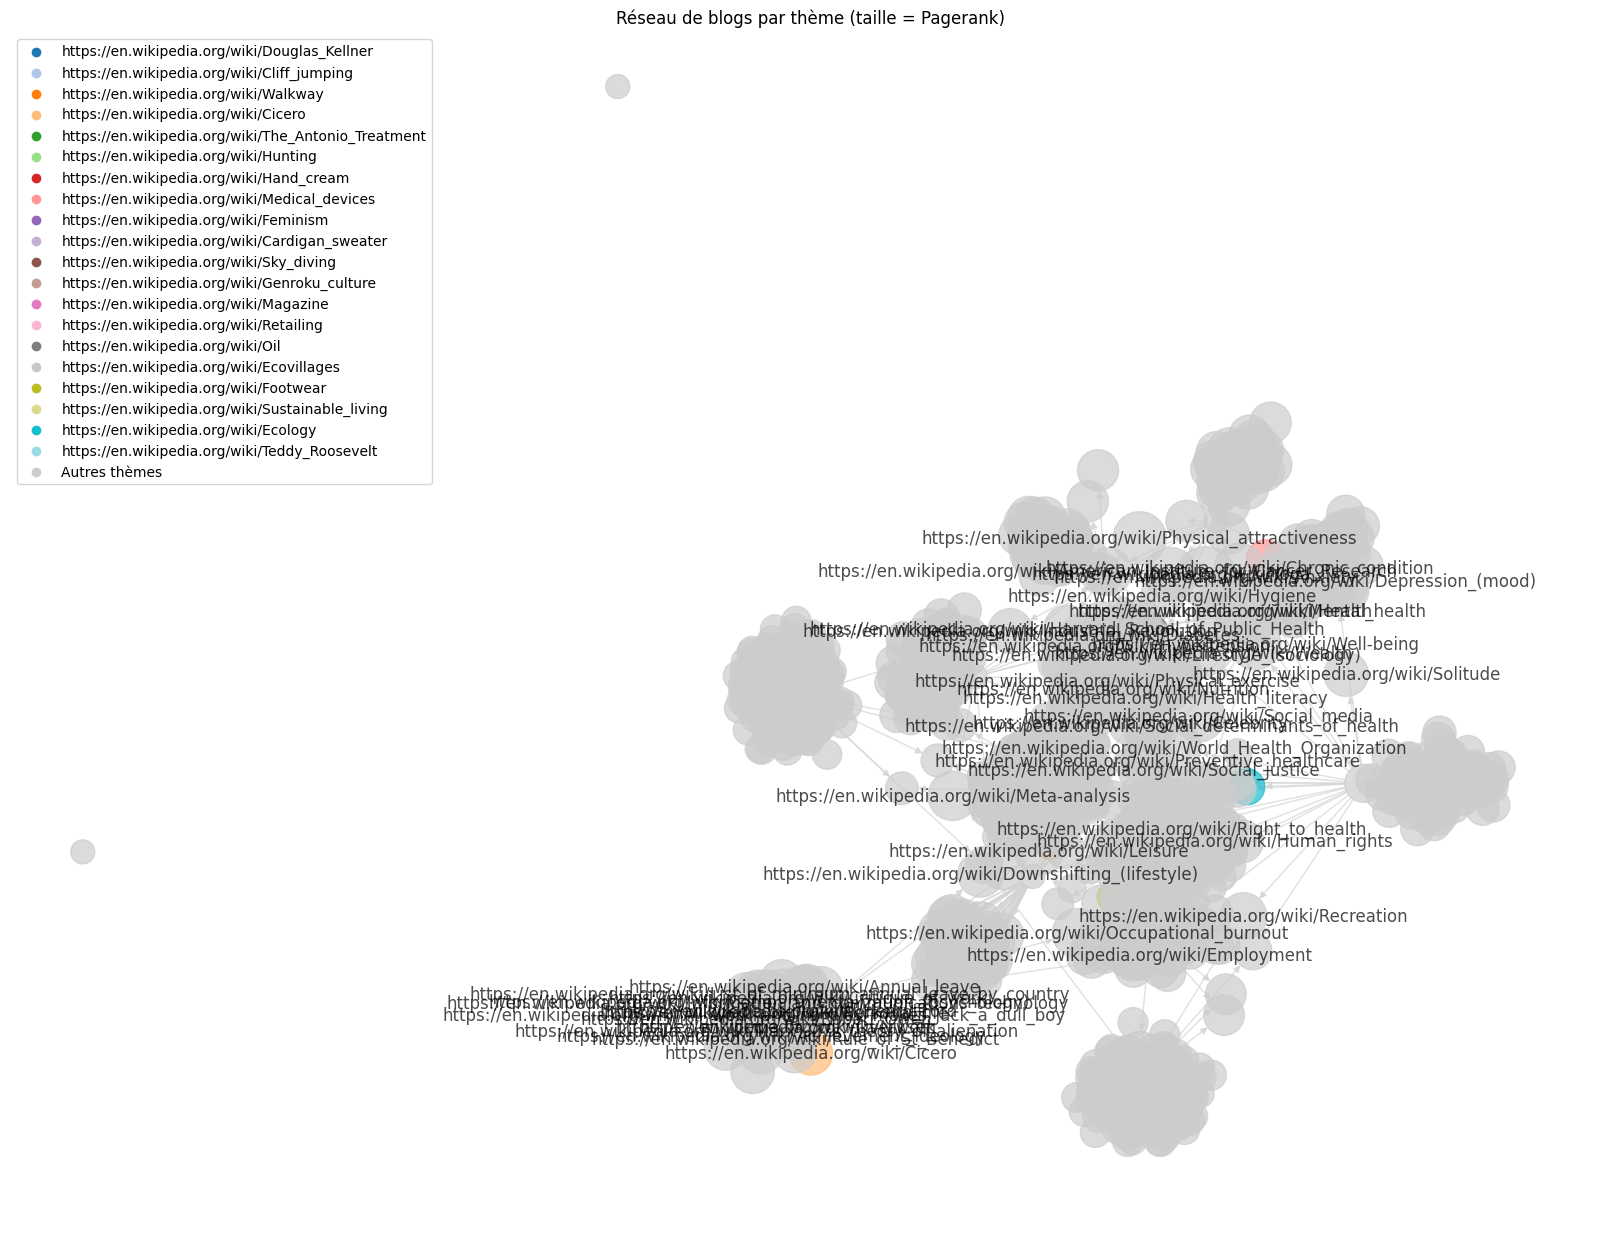

In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# ---------------------------
# Créer le graphe NetworkX à partir de la matrice d’adjacence
# ---------------------------
G = nx.from_numpy_array(wiki_adjacency_matrix, create_using=nx.DiGraph)
mapping = {i: wiki_node_ids[i] for i in range(len(wiki_node_ids))}
G = nx.relabel_nodes(G, mapping)

# ---------------------------
# Préparer les couleurs et tailles des nœuds
# ---------------------------
wiki_nodes_themes['theme'] = wiki_nodes_themes['label']  # pour cohérence
id_to_theme = dict(zip(wiki_nodes_themes['id'], wiki_nodes_themes['theme']))
id_to_pagerank = dict(zip(wiki_nodes_themes['id'], wiki_nodes_themes['pagerank']))

# Thèmes les plus fréquents
top_themes = wiki_nodes_themes['theme'].value_counts().head(20).index.tolist()
theme_color = {theme: plt.cm.tab20(i) for i, theme in enumerate(top_themes)}

# Les thèmes restants seront gris clair
default_color = (0.8, 0.8, 0.8)
node_color = [theme_color.get(id_to_theme[n], default_color) for n in G.nodes()]

# Normaliser les tailles selon Pagerank
pr = np.array([id_to_pagerank[n] for n in G.nodes()])
node_size = 300 + (pr - pr.min()) / (pr.max() - pr.min()) * 2000  # taille entre 300 et 2300

# ---------------------------
# Layout rapide pour grand graphe
# ---------------------------
pos = nx.spring_layout(G, seed=42, k=0.1, iterations=50)  # k réduit pour mieux espacer les nœuds

# ---------------------------
# Labels seulement pour les top 50 Pagerank
# ---------------------------
top_nodes = wiki_nodes_themes.sort_values('pagerank', ascending=False).head(50)['id'].tolist()
labels = {n: n if n in top_nodes else '' for n in G.nodes()}

# ---------------------------
# Dessin du graphe
# ---------------------------
plt.figure(figsize=(16,12))
nx.draw(
    G,
    pos,
    labels=labels,
    node_size=node_size,
    node_color=node_color,
    edge_color='lightgray',
    alpha=0.7,
    arrowsize=10
)

# Légende pour les thèmes les plus fréquents
for theme, color in theme_color.items():
    plt.scatter([], [], c=[color], label=theme)
plt.scatter([], [], c=[default_color], label='Autres thèmes')
plt.legend(scatterpoints=1, fontsize=10)
plt.title("Réseau de blogs par thème (taille = Pagerank)")
plt.show()

